<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%ED%95%9C%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 알고리즘 한계

k-최근접 알고리즘 회귀모델을 사용해본 결과

결론 : 정확한 예측이 어려울 수 있다는 결론

원인

1. 원본데이터의 개수 부족

2. 길이가 50cm인 농어가 들어왔을 때 : 한계점이 생김

In [62]:
# numpy를 이용한 배열생성
# 샘플 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [63]:
#sklearn 을 이용한 훈련데이터, 테스트데이터 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#2차원 배열로 만듬
# -1 : 모든 데이터 선택
# 1 : 모든 데이터가 정답이라는 것 (= 특성 1개)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

#참고데이터 3개로 변경(기본값 : 5개)
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 추가데이터 : 50cm => 예측 : 1033.3g
print(knr.predict([[50]]))

[1033.33333333]


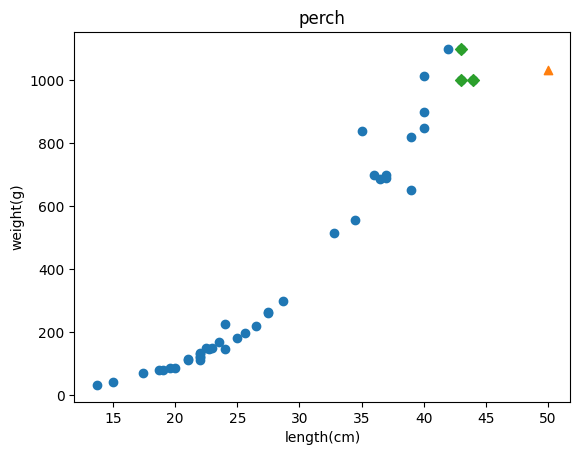

In [65]:
# 그래프
import matplotlib.pyplot as plt
plt.title("perch")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")

#훈련데이터 표시
plt.scatter(train_input, train_target)

#추가데이터사이의 거리측정 및 데이터의 index 반환
plt.scatter(50,1033, marker = "^")
distances, indexes = knr.kneighbors([[50]])

#참고데이터 표시
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

plt.show()

## 결론

기본 데이터부족으로 데이터 예측 한계가 나타남

In [66]:
# 한계
print("50cm  : ",knr.predict([[50]]))
print("100cm : ",knr.predict([[100]]))
print()
print("평균  : ",np.mean(train_target[indexes]))

50cm  :  [1033.33333333]
100cm :  [1033.33333333]

평균  :  1033.3333333333333


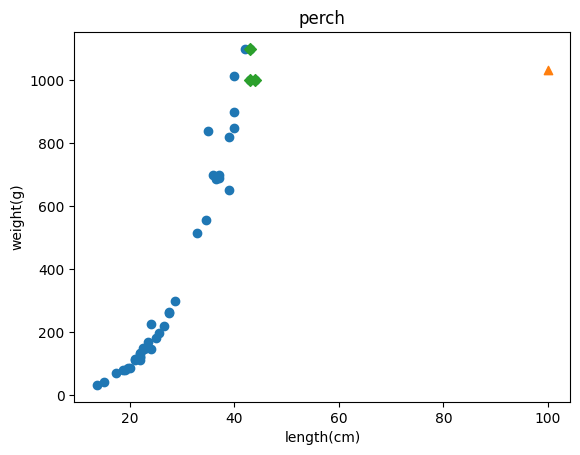

In [67]:
# 그래프
import matplotlib.pyplot as plt
plt.title("perch")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")

#훈련데이터 표시
plt.scatter(train_input, train_target)

#추가데이터사이의 거리측정 및 데이터의 index 반환
plt.scatter(100,1033, marker = "^")
distances, indexes = knr.kneighbors([[50]])

#참고데이터 표시
plt.scatter(train_input[indexes], train_target[indexes], marker="D")

plt.show()

# 선형회귀

선형회귀(linear)
- from sklearn.**linear_model** import **LinearRegression**
- k-최근접 이웃 알고리즘 대안
- 비교적 간단하고, 성능이 뛰어남
- 선형(직선)을 학습하는 알고리즘 : y = ax + b
- 기준 : 빨간선
    - 일직선 : 결론 1개
    - 위~아래 : 반대로 예측
    - 아래~위 : 정상적인 차트

<img src = "https://velog.velcdn.com/images/luoying/post/41527a01-5554-49c6-8497-ce4a09ced097/image.png" >

In [68]:
#LinearRegression : 선형 회귀용
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [69]:
# y(농어의 무게) = a (무게기울기) * x (농어의 길이) + b

print("k-최근접 이웃 회귀 50cm  : ",knr.predict([[50]]))
print("선형회귀 50cm            : ", lr.predict([[50]]))

k-최근접 이웃 회귀 50cm  :  [1033.33333333]
선형회귀 50cm            :  [1241.83860323]


<img src = "https://velog.velcdn.com/images/luoying/post/5ca4b502-caa9-4998-a4a3-1792a2beedbb/image.png">

In [70]:
#coef_ : 기울기 = 종종계수(coefficent) or 가중치(weight)
#intercept_ : 절편 = 인터럽트
print("기울기(coef_ : )", lr.coef_," | 절편(intercept) : " , lr.intercept_)

기울기(coef_ : ) [39.01714496]  | 절편(intercept) :  -709.0186449535477


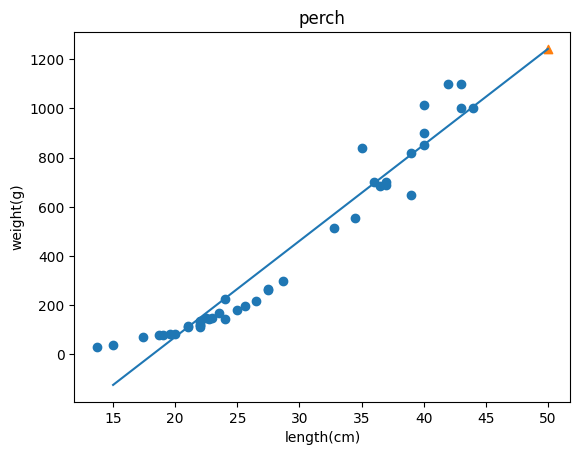

In [71]:
import matplotlib.pyplot as plt
plt.title("perch")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")

#훈련데이터 표시
plt.scatter(train_input, train_target)

#선형회귀 직선표시 : y = 39.0171 * x -709.0186
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

#추가데이터 표시
plt.scatter(50, 1241.8, marker = "^")
plt.show()

## 결론

예측은 가능하나 직선의 한계가 존재(직선적)

In [72]:
print("훈련   : ", lr.score(train_input, train_target))
print("테스트 : ", lr.score(test_input, test_target))
#훈련테스트(0.94) > 테스트(0.82) => 5% 이상차이 => 과대적합

훈련   :  0.939846333997604
테스트 :  0.8247503123313558


# 다항회귀

다항회귀(Polynomial Regression)
- 선현회귀의 문제점(직선적) 개선
- 2차원방정식 : y = a * x^2 + b * x + c
- x에 해당되는 값의 제곱한 항이 훈련세트에 포함(poly)
- 추가데이터 : [제곱한데이터, 원본데이터]형태로 추가

<img src = "https://mblogthumb-phinf.pstatic.net/MjAxODA3MjFfNTEg/MDAxNTMyMTY0MTQ5NjI1.Uz22PZY2kYsOPBffcq-Im13zbBVy3YFc68P6bqp4PJwg.NkDXy2ID-8yHggeWyFmOCN8FHBDVyD50bCu0X3k5_dIg.PNG.roy1124/image.png?type=w800">

In [73]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [74]:
#[제곱한 값, 원본]
print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [75]:
from sklearn.linear_model import LinearRegression
lrp = LinearRegression()
lrp.fit(train_poly, train_target)

# 추가데이터 : [제곱한데이터, 원본데이터]형태로 넣어야함
print("다항회귀 50cm : ", lrp.predict([[50**2, 50]]))

다항회귀 50cm :  [1573.98423528]


In [76]:
print(lrp.coef_, lr.intercept_)
#결론 : y = 1.014*x^2 -21.5579 * x + 116.0502

[  1.01433211 -21.55792498] -709.0186449535477


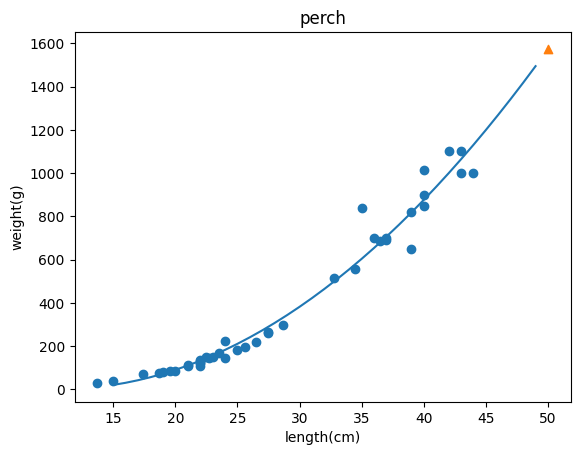

In [77]:
import matplotlib.pyplot as plt
import numpy as np
plt.title("perch")
plt.xlabel("length(cm)")
plt.ylabel("weight(g)")

# 구간별 직선을 그리기 위해 15~49까지 정수배열
point = np.arange(15,50)
plt.plot(point, 1.014*point**2 - 21.5579 * point + 116.0502) #다항곡선식

#훈련데이터 추가
plt.scatter(train_input, train_target)

#추가데이터 추가
plt.scatter([50], [1573.984], marker = "^")
plt.show()

In [78]:
print("훈련   : ", lrp.score(train_poly, train_target))
print("테스트 : ", lrp.score(test_poly, test_target))
# 훈련(0.9706) < 테스트(0.9775) : 과소적합

훈련   :  0.9706807451768623
테스트 :  0.9775935108325122


## 결론

선형회귀의 직선적 문제점을 개선

단, 아직 과소적합이 남아 있기에 복잡한 모델을 제작해야함

모델의 복잡도가 너무 높을 경우 억제하는 방법을 알아야 함

# 최종결론

In [80]:
# 50cm 예측결과
print("k-최근접 이웃 회귀 50cm  : ",knr.predict([[50]]))
print("선형회귀 50cm            : ", lr.predict([[50]]))
print("다항회귀 50cm            : ", lrp.predict([[50**2, 50]]))

k-최근접 이웃 회귀 50cm  :  [1033.33333333]
선형회귀 50cm            :  [1241.83860323]
다항회귀 50cm            :  [1573.98423528]


In [83]:
print("k-최근접 이웃 회귀")
print("훈련   : ", knr.score(train_input, train_target))
print("테스트 : ", knr.score(test_input, test_target))
print("훈련테스트(0.98) > 테스트(0.97) => 과대적합")

print()
print("선형회귀")
print("훈련   : ", lr.score(train_input, train_target))
print("테스트 : ", lr.score(test_input, test_target))
print("훈련테스트(0.94) > 테스트(0.82) => 5% 이상차이 => 과대적합")

print()
print("다항회귀")
print("훈련   : ", lrp.score(train_poly, train_target))
print("테스트 : ", lrp.score(test_poly, test_target))
print("훈련(0.9706) < 테스트(0.9775) : 과소적합")

k-최근접 이웃 회귀
훈련   :  0.9804899950518966
테스트 :  0.9746459963987609
훈련테스트(0.98) > 테스트(0.97) => 과대적합

선형회귀
훈련   :  0.939846333997604
테스트 :  0.8247503123313558
훈련테스트(0.94) > 테스트(0.82) => 5% 이상차이 => 과대적합

다항회귀
훈련   :  0.9706807451768623
테스트 :  0.9775935108325122
훈련(0.9706) < 테스트(0.9775) : 과소적합
